In [163]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from math import sqrt
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import samplesize_confint_proportion

In [164]:
normal_interval = proportion_confint(1, 50, method = 'normal')
normal_interval[0]

-0.018805307081790987

In [165]:
normal_interval = proportion_confint(1, 50, method = 'wilson')
normal_interval[0]

0.0035392592716462362

In [166]:
n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.01)))
print n_samples
n_samples = samplesize_confint_proportion(0.02, 0.005)
print n_samples

753
3011.70371542


[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]


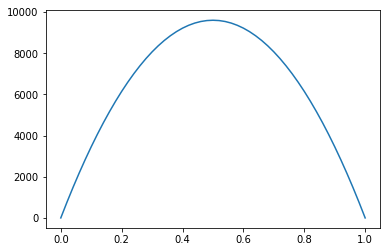

In [167]:
x = [i / 50. for i in range(51)]
y = []
for p in x:
    n_samples = int(np.ceil(samplesize_confint_proportion(p, 0.01)))
    y.append(n_samples)
print x
plt.plot(x,y)
plt.show()

In [168]:
print np.max(y)

9604


In [169]:
n_samples = int(np.ceil(samplesize_confint_proportion(0.5, 0.01)))
n_samples

9604

In [170]:
normal_interval = proportion_confint(1, 50, method = 'normal')

# Test

$\textbf{№1}$

In [171]:
np.around(_tconfint_generic(0, 1, 1000000000, 1-0.997, 'two-sided')[1], 4)

2.9676999999999998

$\textbf{№2}$ 
St

$\textbf{№3}$ F and xi

$\textbf{№4}$ f - g

$\textbf{№5}$ В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

In [172]:
a = proportion_confint(104, 11037 , method = 'normal')

In [173]:
b = proportion_confint(189, 11034 , method = 'normal')

In [174]:
189./11034 - 104. / 11037

0.0077060239760047815

$\textbf{№6}$

In [197]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = zip(sample1, sample2)
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

a = np.hstack((np.ones(104), np.zeros(11037 - 104)))
b = np.hstack((np.ones(189), np.zeros(11034 - 189)))
print proportions_confint_diff_ind(b, a)[1]

0.010724297277


$\textbf{№7}$

In [198]:
c_1 = (189/11034.) / (1 - (189/11034.))
c_2 = (104./11037.)/(1. - (104./11037.))
c_1 / c_2

1.8320539419087138

$\textbf{№8}$

In [195]:
def get_bootstrap_samples(data, n_samples):
    
    indices = np.random.RandomState(seed=0).randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def get_chance(data):
    ones = 0.
    for i in range(len(data)):
        if data[i] == 1:
            ones += 1
    p = ones / len(data)
    return p/(1 - p)

asp_chances = map(get_chance, get_bootstrap_samples(a, 1000))
plac_chaces = map(get_chance, get_bootstrap_samples(b, 1000))

In [196]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

chances_scores = map(lambda x: x[0] / x[1], zip(plac_chaces, asp_chances))
stat_intervals(chances_scores, 0.05)[0]

1.6303546232738955